In [2]:
# import lib
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton
import glob

In [3]:
m = morton.Morton(dimensions=2, bits=18)
def set_value(data,key1,key2):    
    return m.pack(int(data[key1]), int(data[key2]))


In [4]:
def load_data_encode_with_morton(fileName,key1,key2,ts_key,offset1=0,offset2=0,multiplier1=1,multiplier2=1):
    df = pd.read_csv(fileName, sep=';', usecols = [ts_key,key1,key2])
    df=df.dropna()
    df[key1+'modified']=df[key1].add(offset1)
    df[key2+'modified']=df[key2].add(offset2)
    df[key1+'modified']=df[key1+'modified'].multiply(multiplier1)
    df[key2+'modified']=df[key2+'modified'].multiply(multiplier2)
    df['morton']=df.apply(set_value,args=(key1+'modified',key2+'modified'),axis=1)
    return df


In [5]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15),sharex='all')    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=0.5)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1


In [6]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=1)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        sfc_list.append(ax[row_position,column_position])
        ax[row_position,column_position+1].plot(df[key1],df[ts_key],df[key2],df[ts_key])
        ax[row_position,column_position+1].invert_yaxis()
        original_list.append(ax[row_position,column_position+1])
        if not (row_position==0 and column_position==0):
            ax[row_position,column_position].sharex(ax[0,0])
            ax[row_position,column_position+1].sharex(ax[0,1])
        column_position=column_position+2
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
   


In [7]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='black',s=2)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        secax=ax[row_position,column_position].twiny()
        secax.plot(df[key1],df[ts_key],df[key2],df[ts_key])
        original_list.append(secax)
        sfc_list.append(ax[row_position,column_position])
        if not(row_position==0 and column_position==0):
            secax.sharex(original_list[0])
            ax[row_position,column_position].sharex(sfc_list[0])
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
   


In [8]:
LaneChange_Path_5hz='./data/lane_changes/5hz/'
LaneChange_Path_10hz='./data/lane_changes/10hz/'
LaneChange_Path_20hz='./data/lane_changes/20hz/'
LaneChange_Update_Path='./data/lane_changes_updated/'

In [10]:
def get_data_infomation(filePath,key1,key2):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    result=[]
    for file in csv_files:
        df = pd.read_csv(file, sep=';', usecols = [key1,key2])
        df=df.dropna()
        result.append([file,df[key1].median(),df[key1].max(),df[key1].min(),df[key2].median(),df[key2].max(),df[key2].min(),max(df[key1].max(),df[key2].max()),min(df[key1].min(),df[key2].min()),max(df[key1].max(),df[key2].max())-min(df[key1].min(),df[key2].min())])
        data_info_df=pd.DataFrame(result,columns=[file,key1+'_median',key1+'_max',key1+'min',key2+'_median',key2+'_max',key2+'min','pair_max','pair_min','max_min_distance'])
    return data_info_df

In [11]:
info_5hz=get_data_infomation(LaneChange_Path_5hz,'accel_lon','accel_trans')
offset_5hz_lowboundry=max(info_5hz['max_min_distance'])
offset_5hz_lowboundry

8.575610999999999

In [12]:
offset_5hz=16

In [13]:
info_10hz=get_data_infomation(LaneChange_Path_10hz,'accel_lon','accel_trans')
offset_10hz_lowboundry=max(info_10hz['max_min_distance'])
offset_10hz_lowboundry

9.438922

In [14]:
info_20hz=get_data_infomation(LaneChange_Path_20hz,'accel_lon','accel_trans')
offset_20hz_lowboundry=max(info_20hz['max_min_distance'])
offset_20hz_lowboundry

9.782024

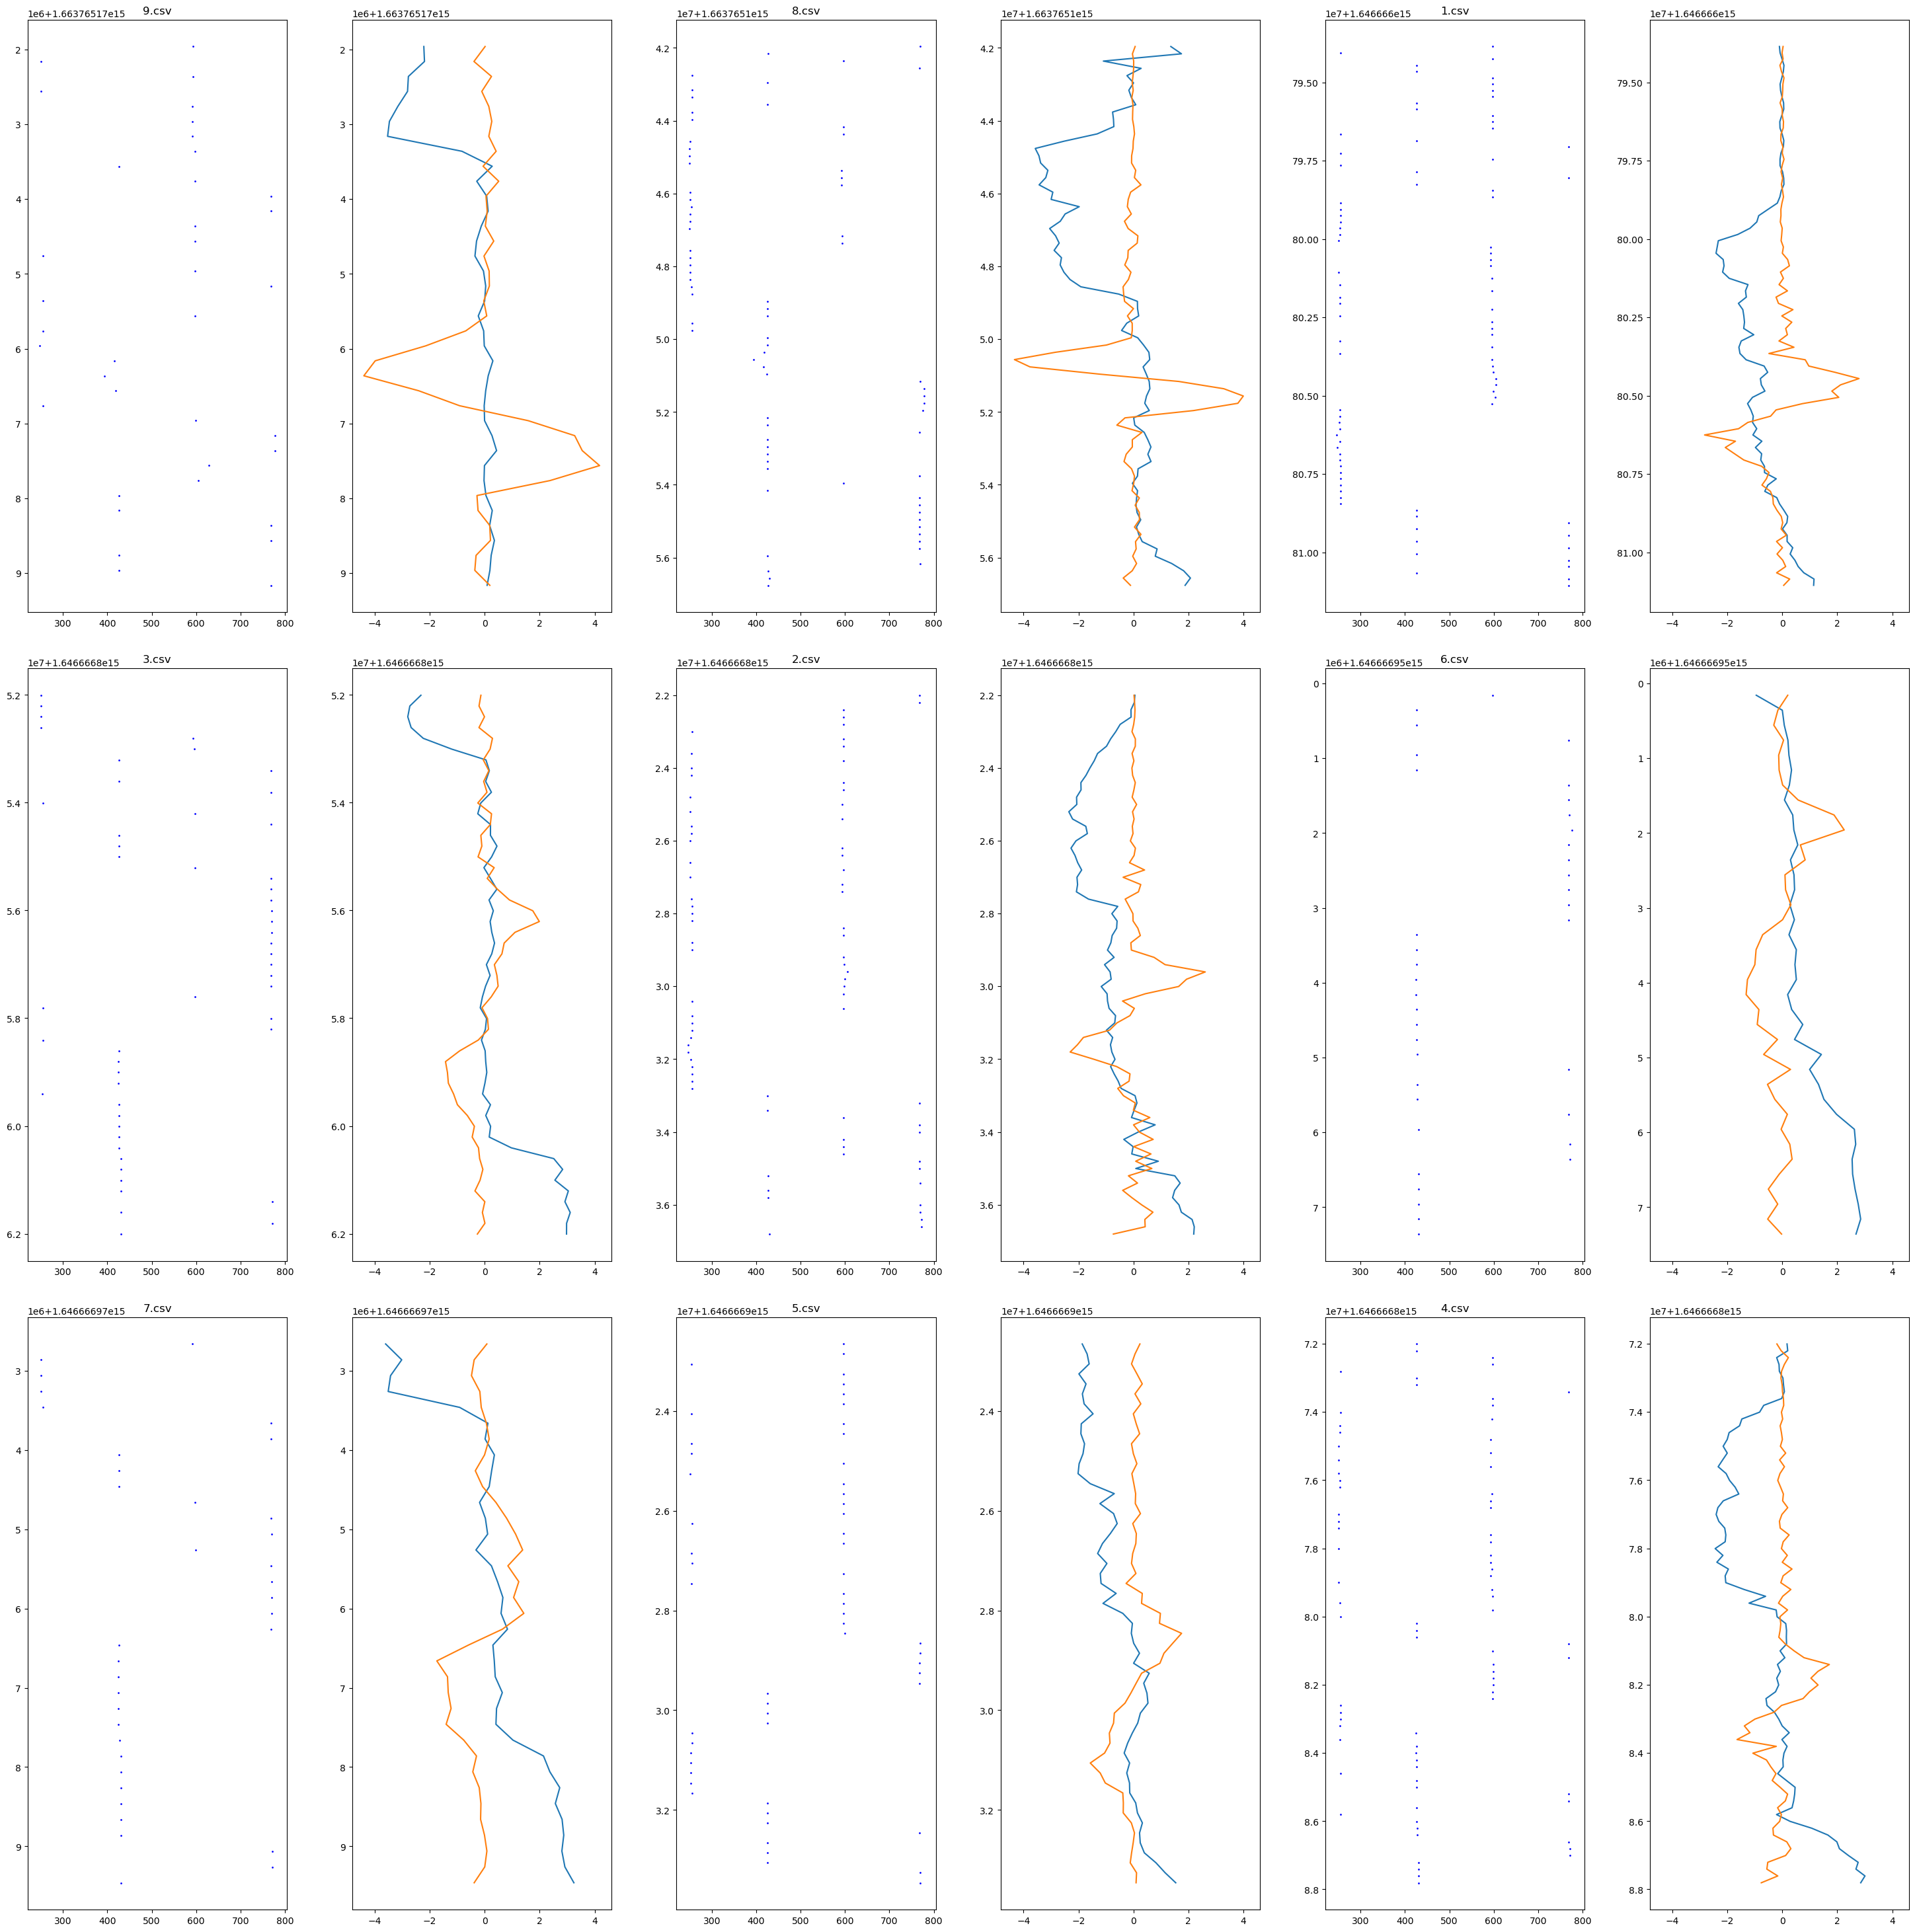

In [206]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

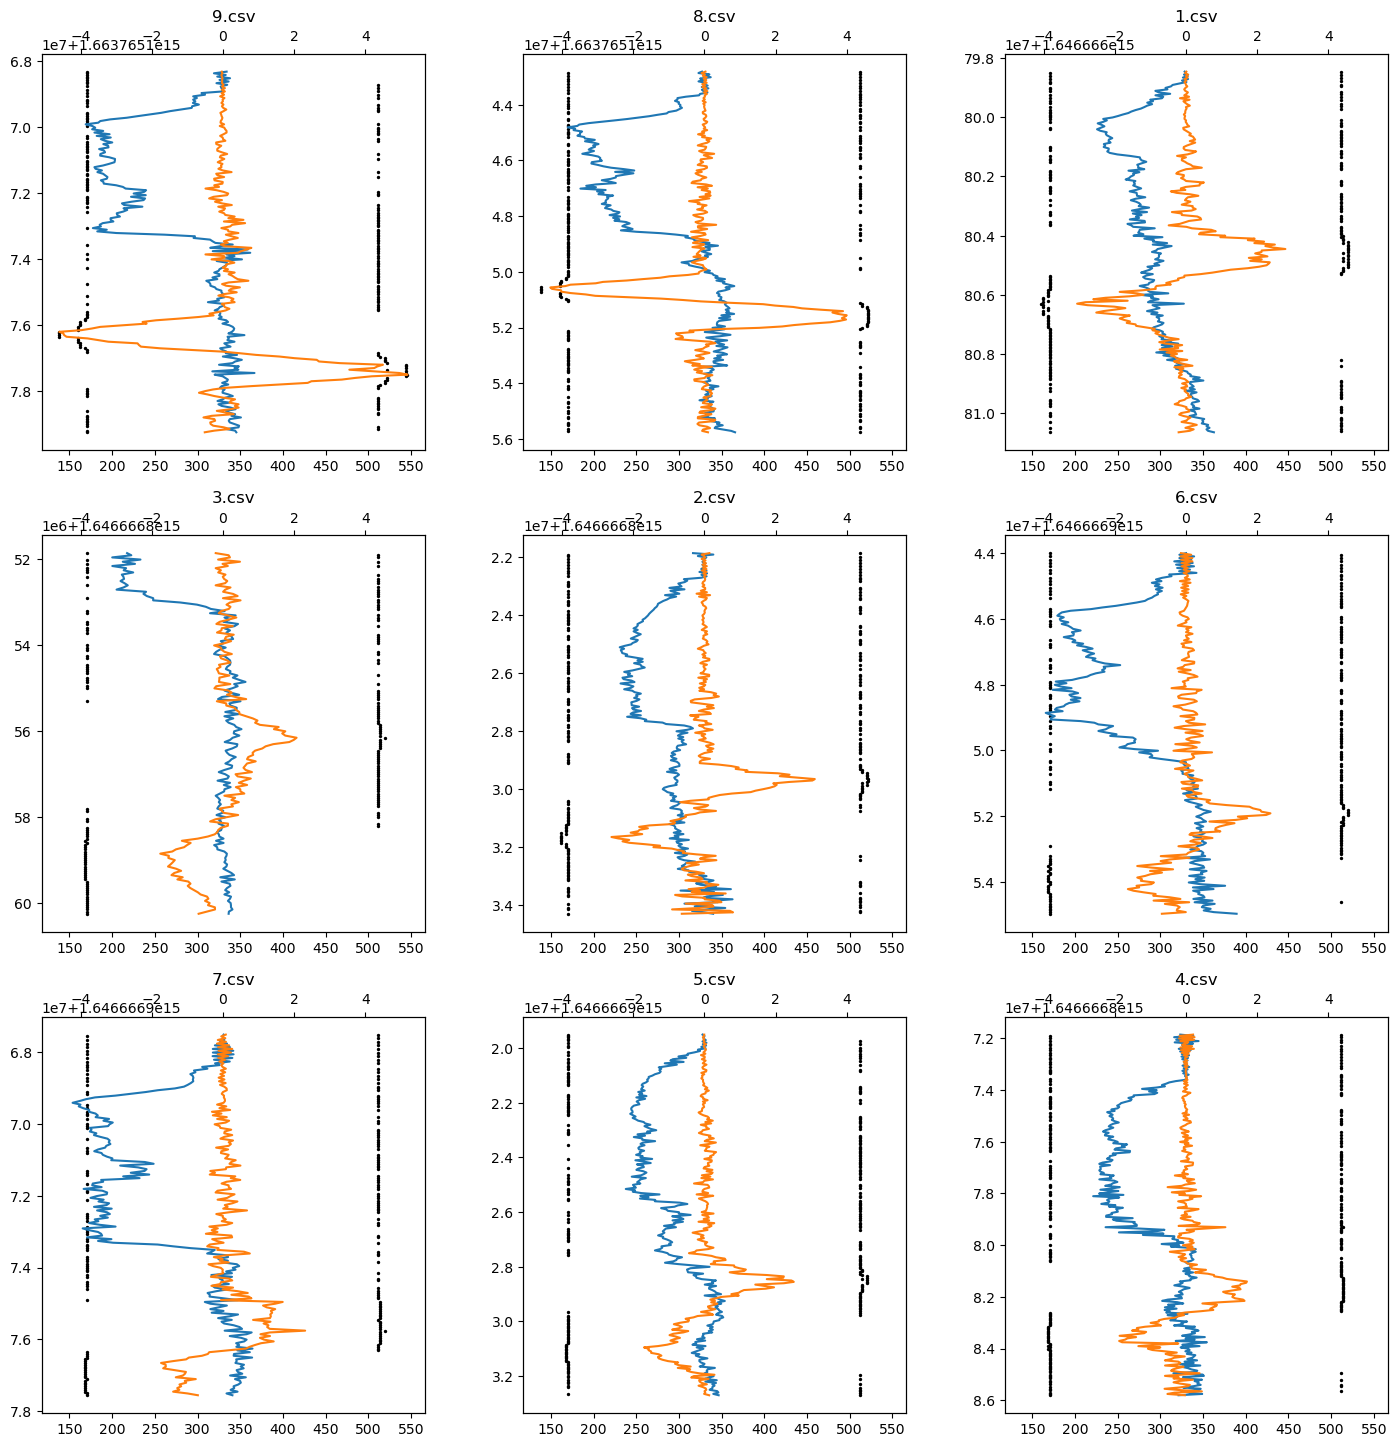

In [204]:
# only take accel_trans in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,0,1,3,3)

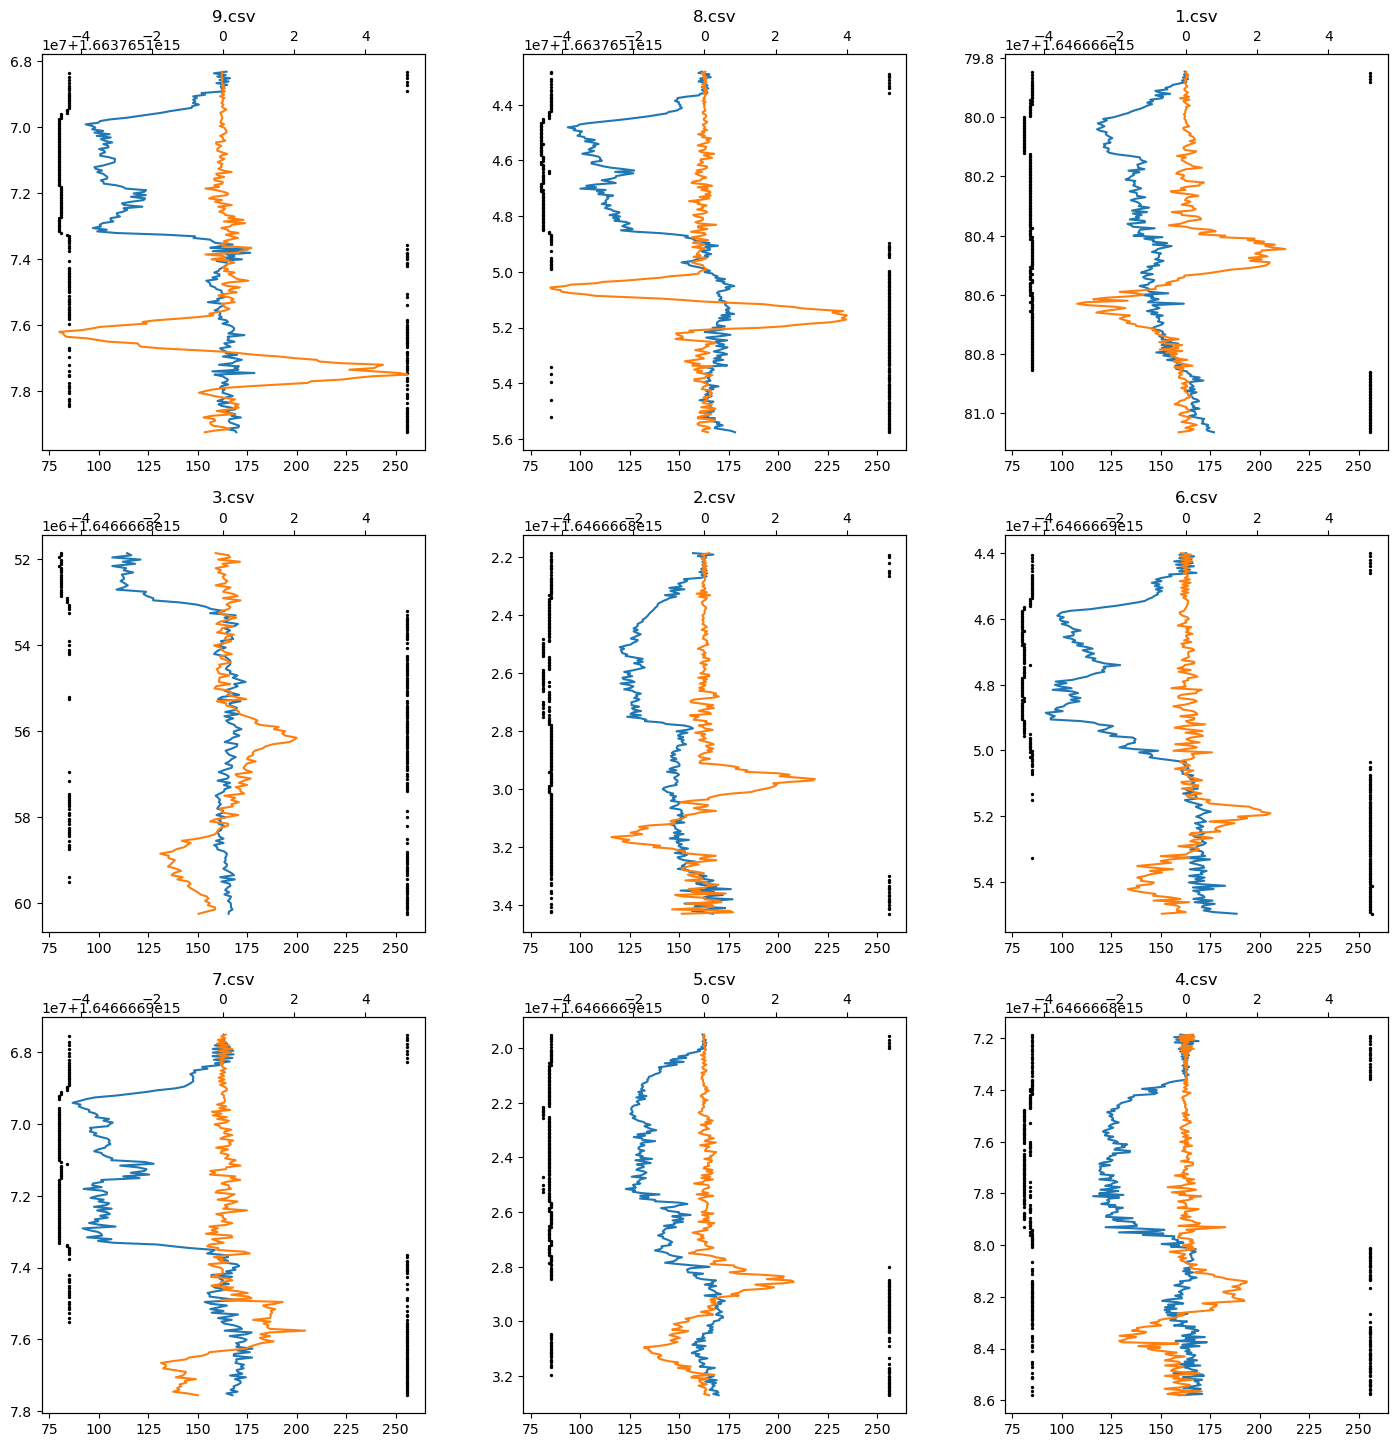

In [205]:
# only take accel_lon in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,0,3,3)

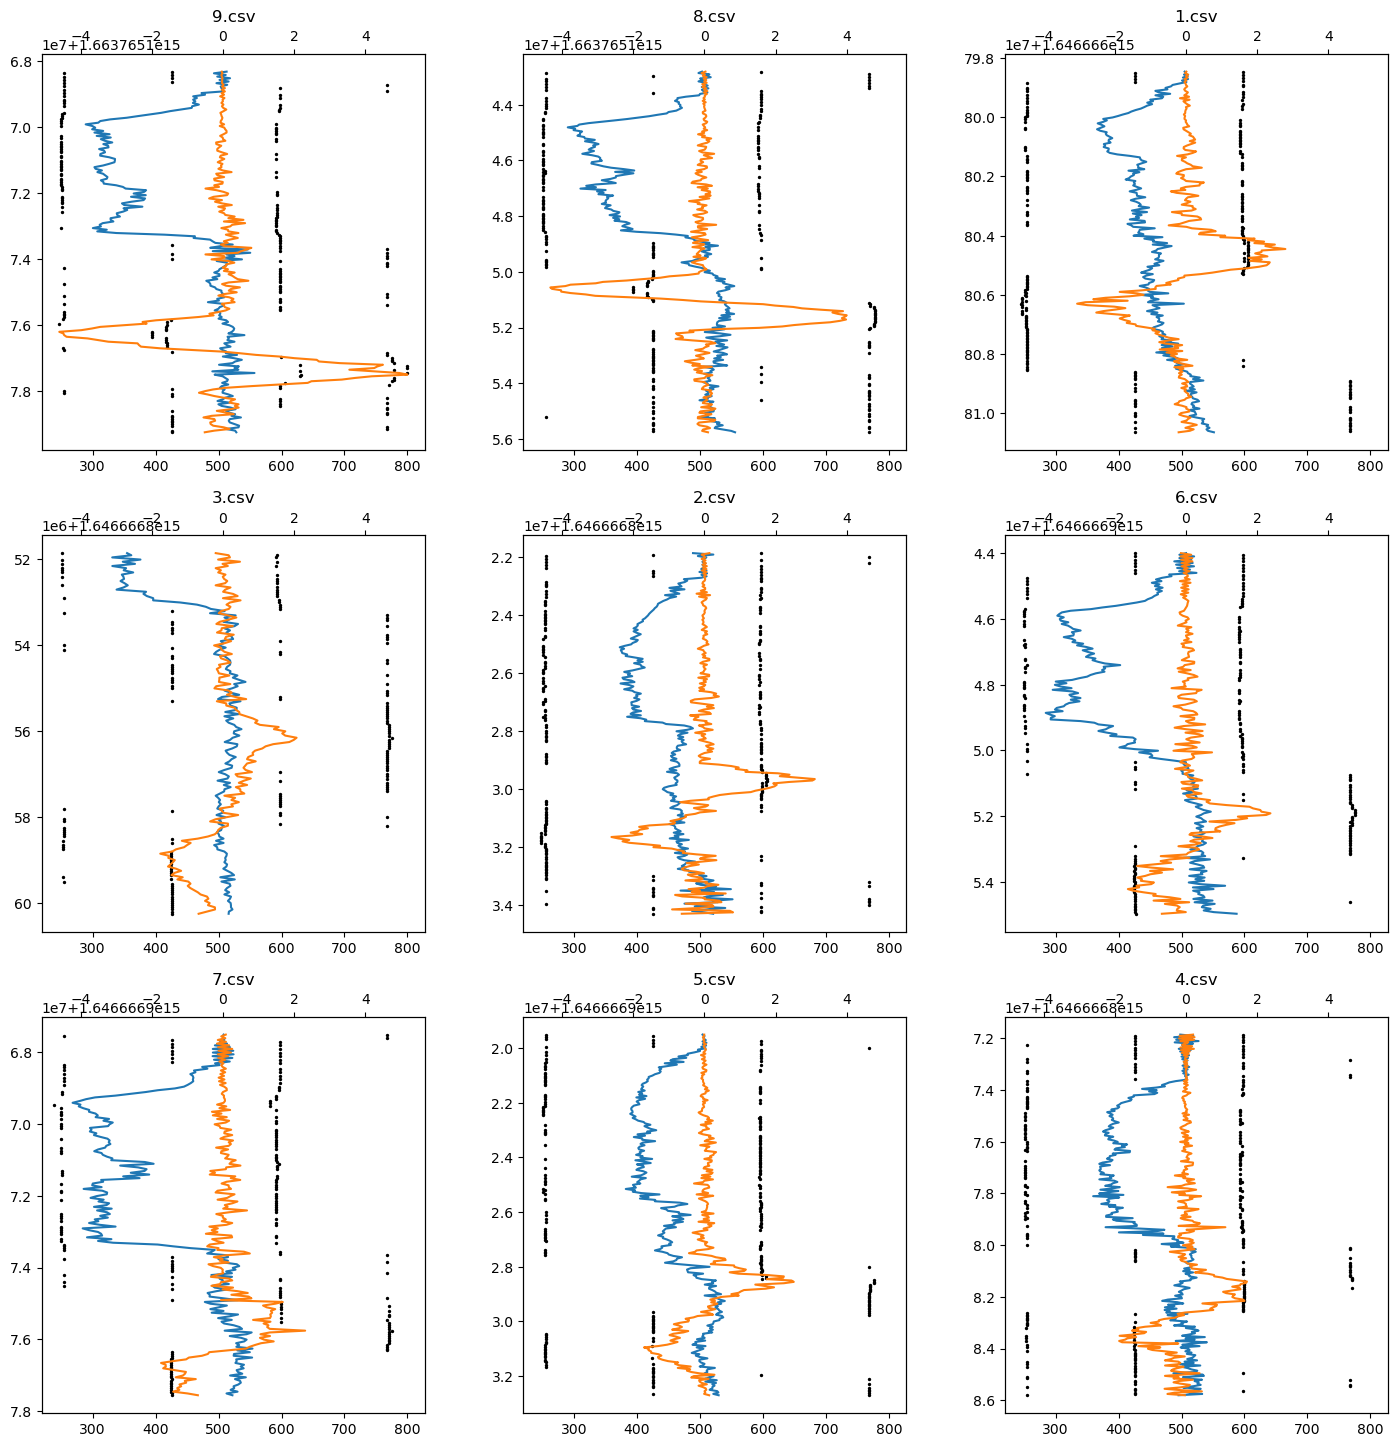

In [203]:
# only take accel_trans in consideration
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,3)

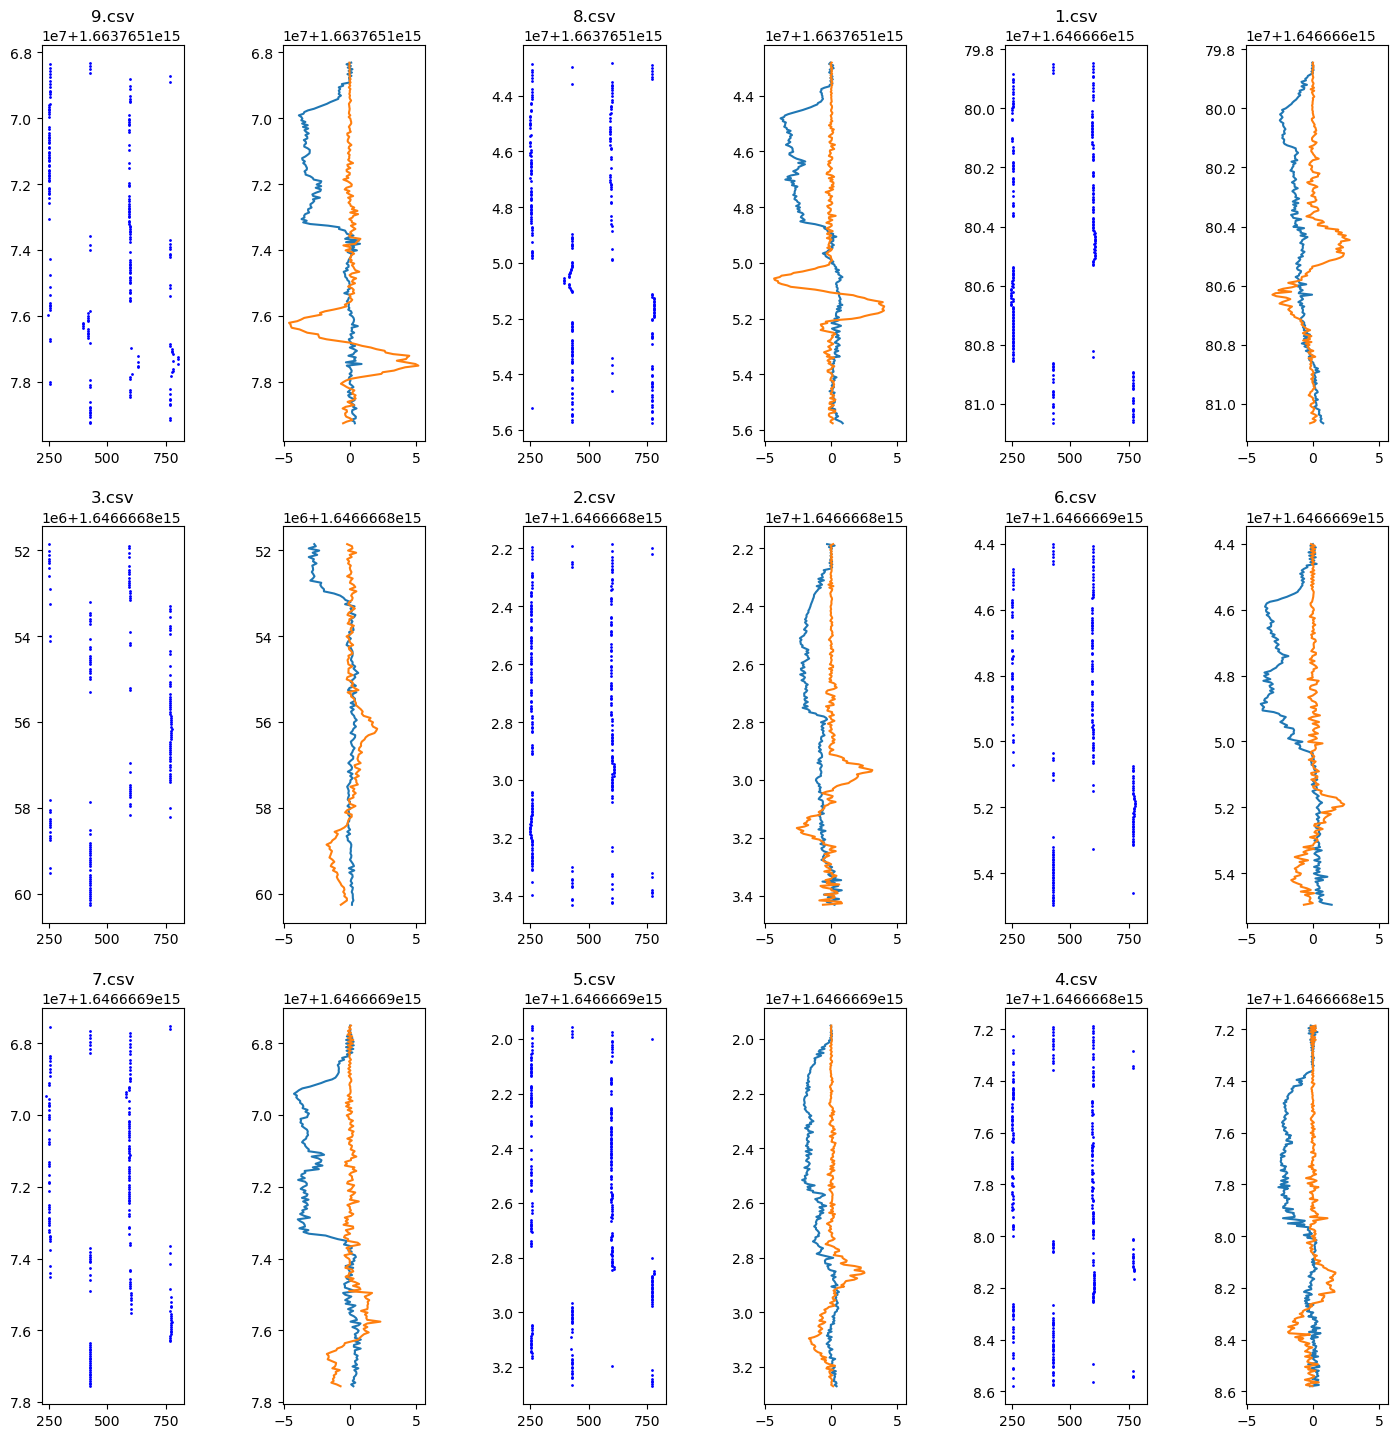

In [212]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

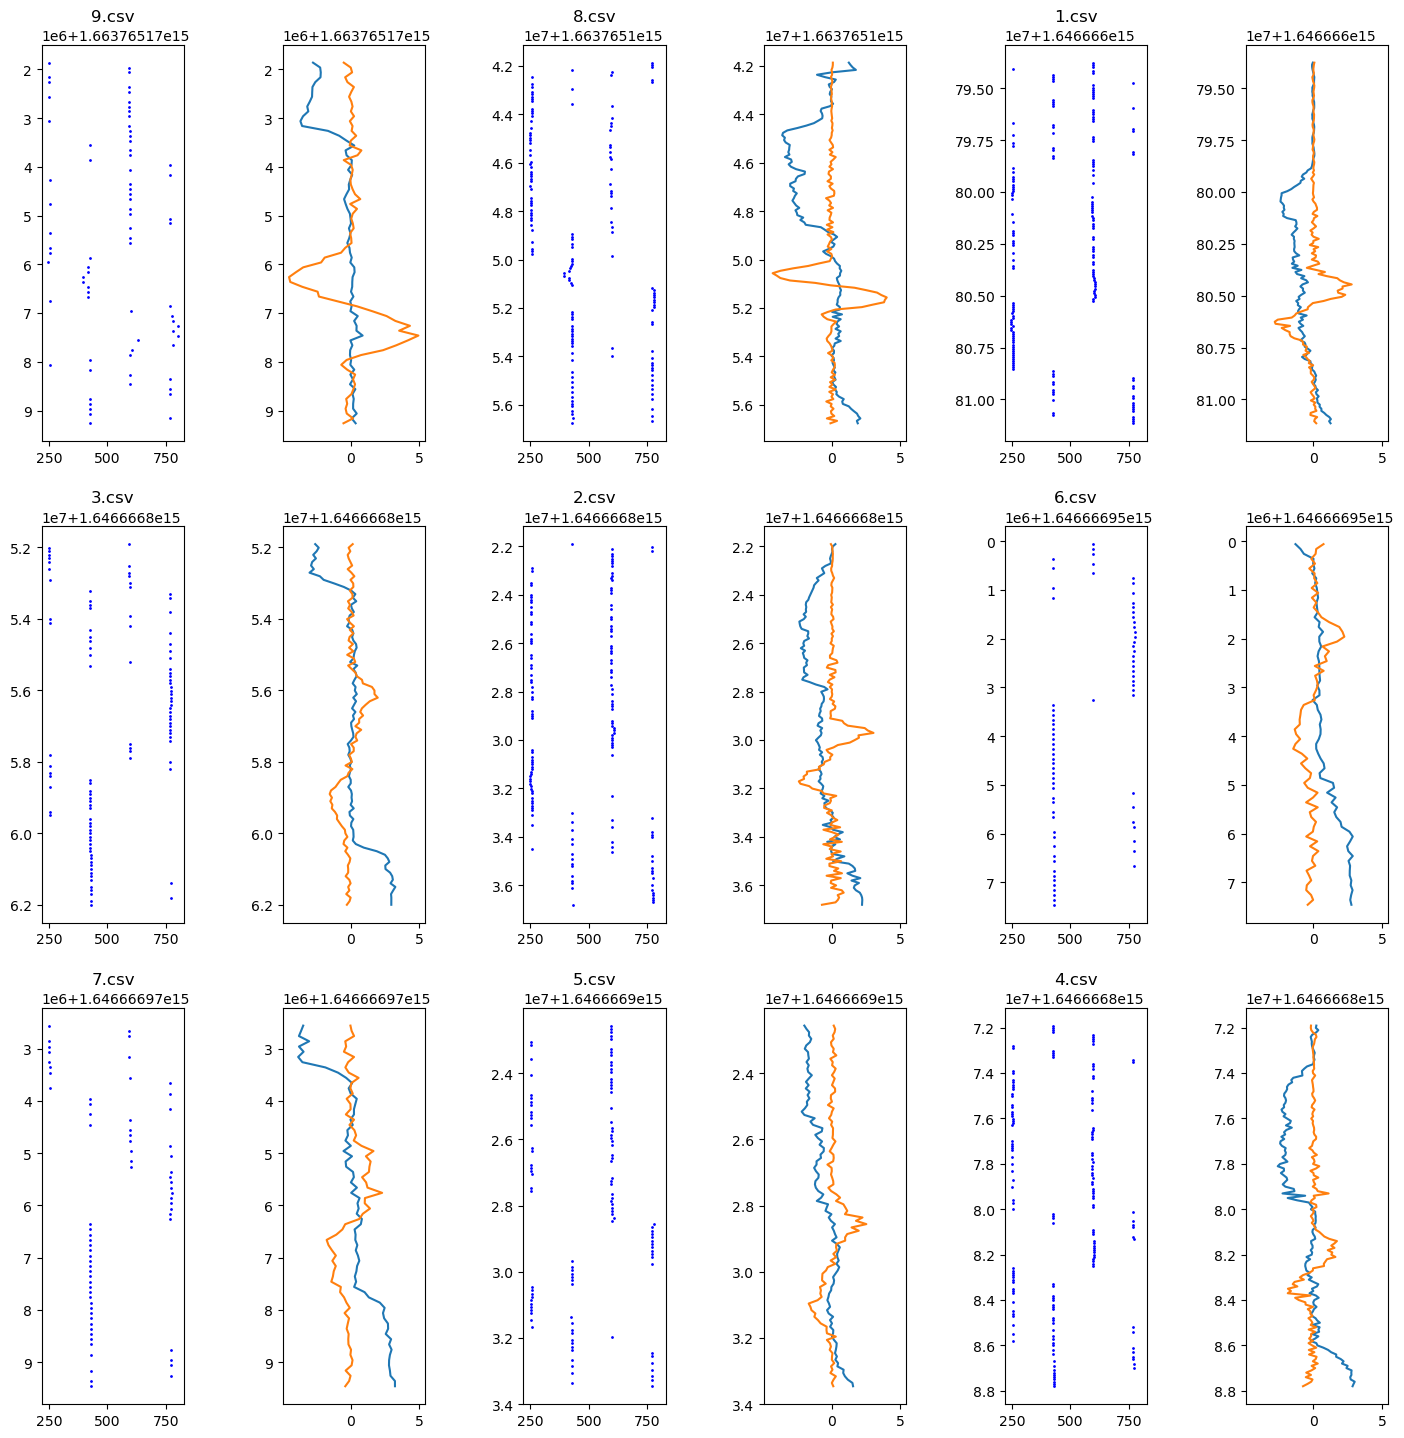

In [213]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_10hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

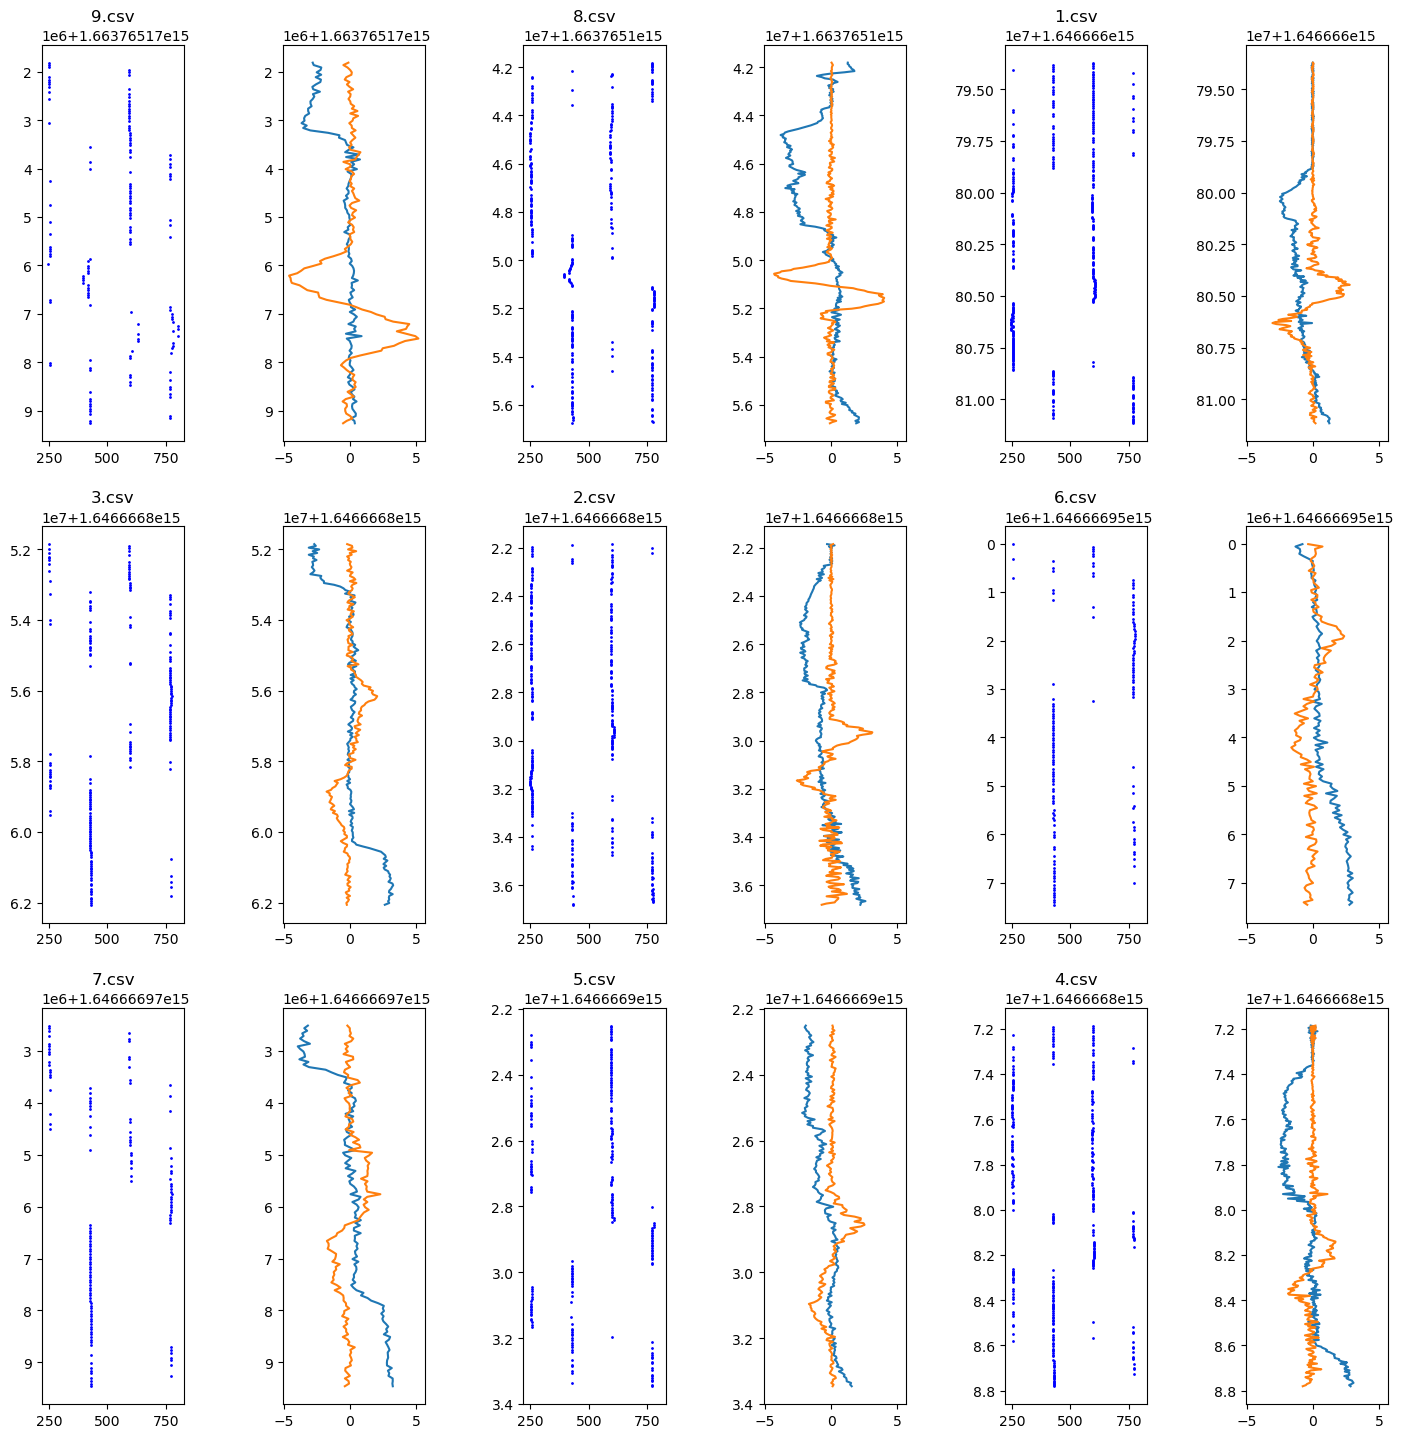

In [214]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data(LaneChange_Path_20hz,'accel_lon','accel_trans','ts',16,16,1,1,3,6)

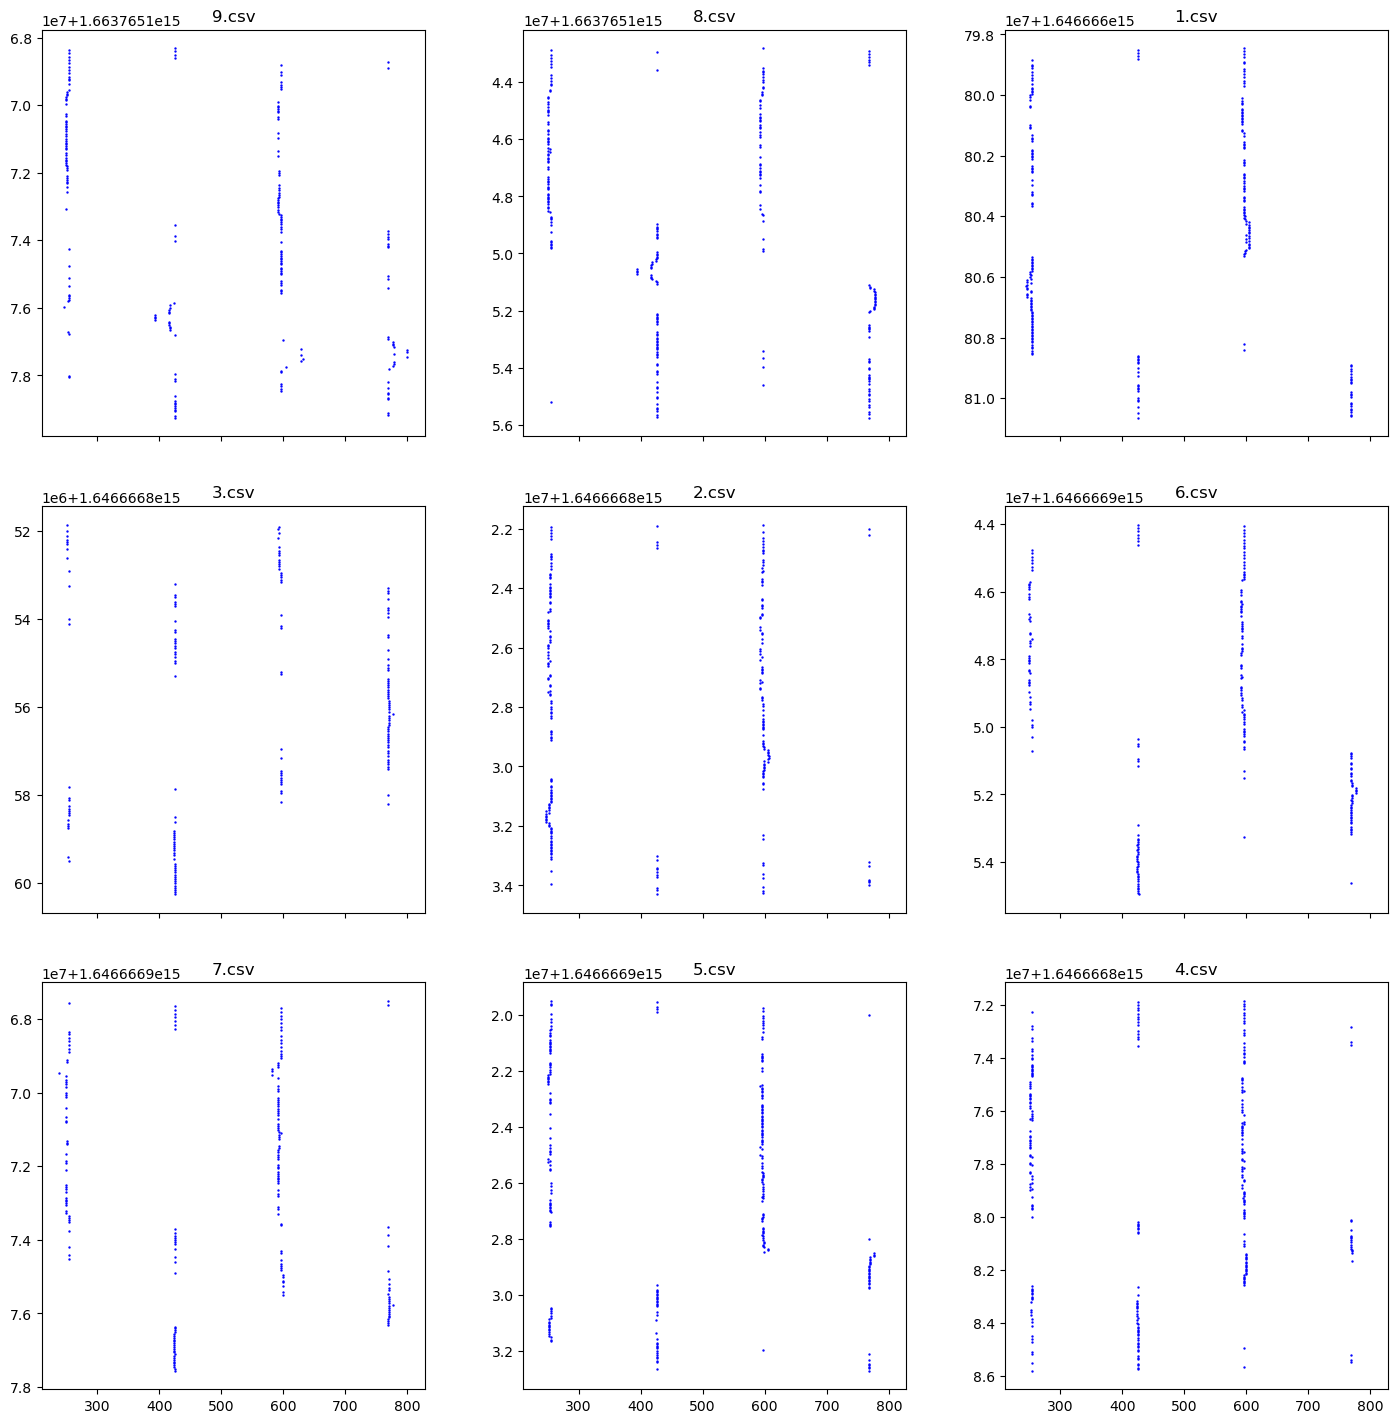

In [215]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,3)

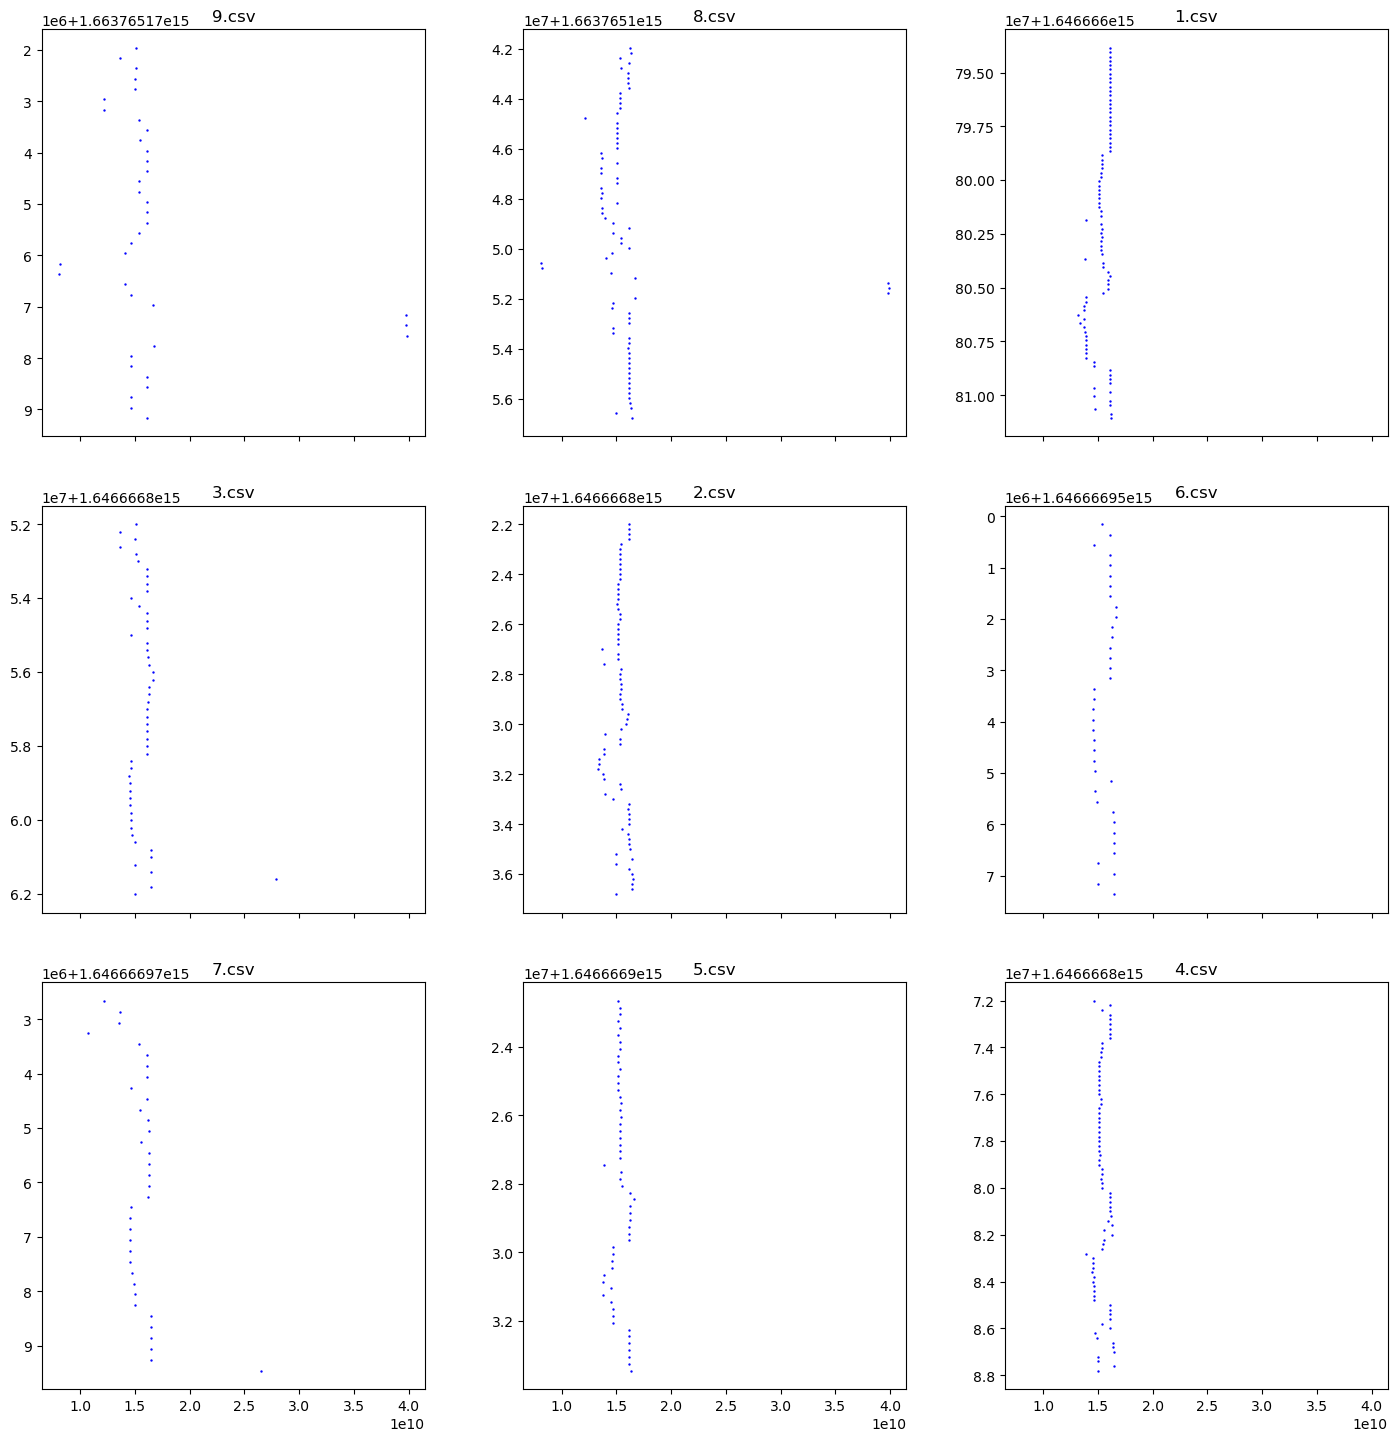

In [216]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',10,10,10000,10000,3,3)

In [15]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,colors,shapes):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    plt.gca().invert_yaxis()
    plot_index=0
    color_index = 0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        plt.scatter(x=df['morton'],y=df.index,marker=shapes[plot_index], color=colors[color_index]) 
        plot_index= plot_index+1
        if plot_index==len(shapes)-1:
            color_index=color_index+1
            plot_index=0
        
        

In [16]:
markers = ["." , "," , "o" ]
colors = ['r','g','b','c','m', 'y', 'k']

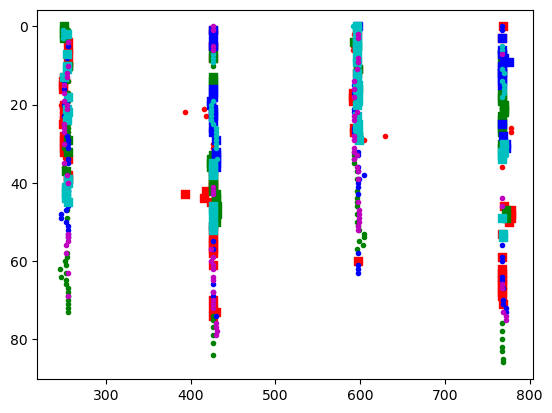

In [219]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,16,1,1,colors,markers)

In [17]:
def get_baseline_sfc_value(value1,value2):
    return m.pack(int(value1), int(value2))


In [18]:
# transfor accel_lon=0,accel_trans=0 with offset 16, multiplier 1
baseline_origin=get_baseline_sfc_value(16,16)
baseline_origin

768

In [19]:
# transfor accel_lon=-2,accel_trans=0 with offset 16, multiplier 1
baseline_lon_0_2=get_baseline_sfc_value(14,16)
baseline_lon_0_2

596

In [20]:
# transfor accel_lon=0,accel_trans=2 with offset 16, multiplier 1
baseline_trans_2=get_baseline_sfc_value(16,18)
baseline_trans_2

776

In [21]:
# transfor accel_lon=0,accel_trans=-2 with offset 16, multiplier 1
baseline_trans_0_2=get_baseline_sfc_value(16,14)
baseline_trans_0_2

424

In [22]:
# transfor accel_lon=-2,accel_trans=-2 with offset 16, multiplier 1
baseline_lon_0_2_trans_0_2=get_baseline_sfc_value(14,14)
baseline_lon_0_2_trans_0_2

252

In [24]:
# transfor accel_lon=-2,accel_trans=2 with offset 16, multiplier 1
baseline_lon_0_2_trans_2 = get_baseline_sfc_value(14,18)
baseline_lon_0_2_trans_2


604

In [26]:
baselines_list=[baseline_origin,baseline_lon_0_2,baseline_trans_0_2,baseline_trans_2,baseline_lon_0_2_trans_0_2,baseline_lon_0_2_trans_2]
baseline_color_list=['red','blue','orange','yellow','purple','green']

In [56]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis_with_baseline(filePath,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2,plot_row,plot_column,baseline_list,color_list):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))    
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    sfc_list=[]
    original_list=[]
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset1,offset2,multiplier1,multiplier2)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='black',s=2)
        ax[row_position,column_position].set_title(file[-5:])
        ax[row_position,column_position].invert_yaxis()
        secax=ax[row_position,column_position].twiny()
        secax.plot(df[key1],df[ts_key],df[key2],df[ts_key])
        for i,baseline in enumerate(baseline_list):
            ax[row_position,column_position].axvline(x=baseline,color=color_list[i])
        original_list.append(secax)
        sfc_list.append(ax[row_position,column_position])
        if not(row_position==0 and column_position==0):
            secax.sharex(original_list[0])
            ax[row_position,column_position].sharex(sfc_list[0])
            
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1
    f,a=plt.subplots()
    for i,baseline in enumerate(baseline_list):
        a.axvline(x=baseline,color=color_list[i])
    


AttributeError: 'int' object has no attribute 'varname'

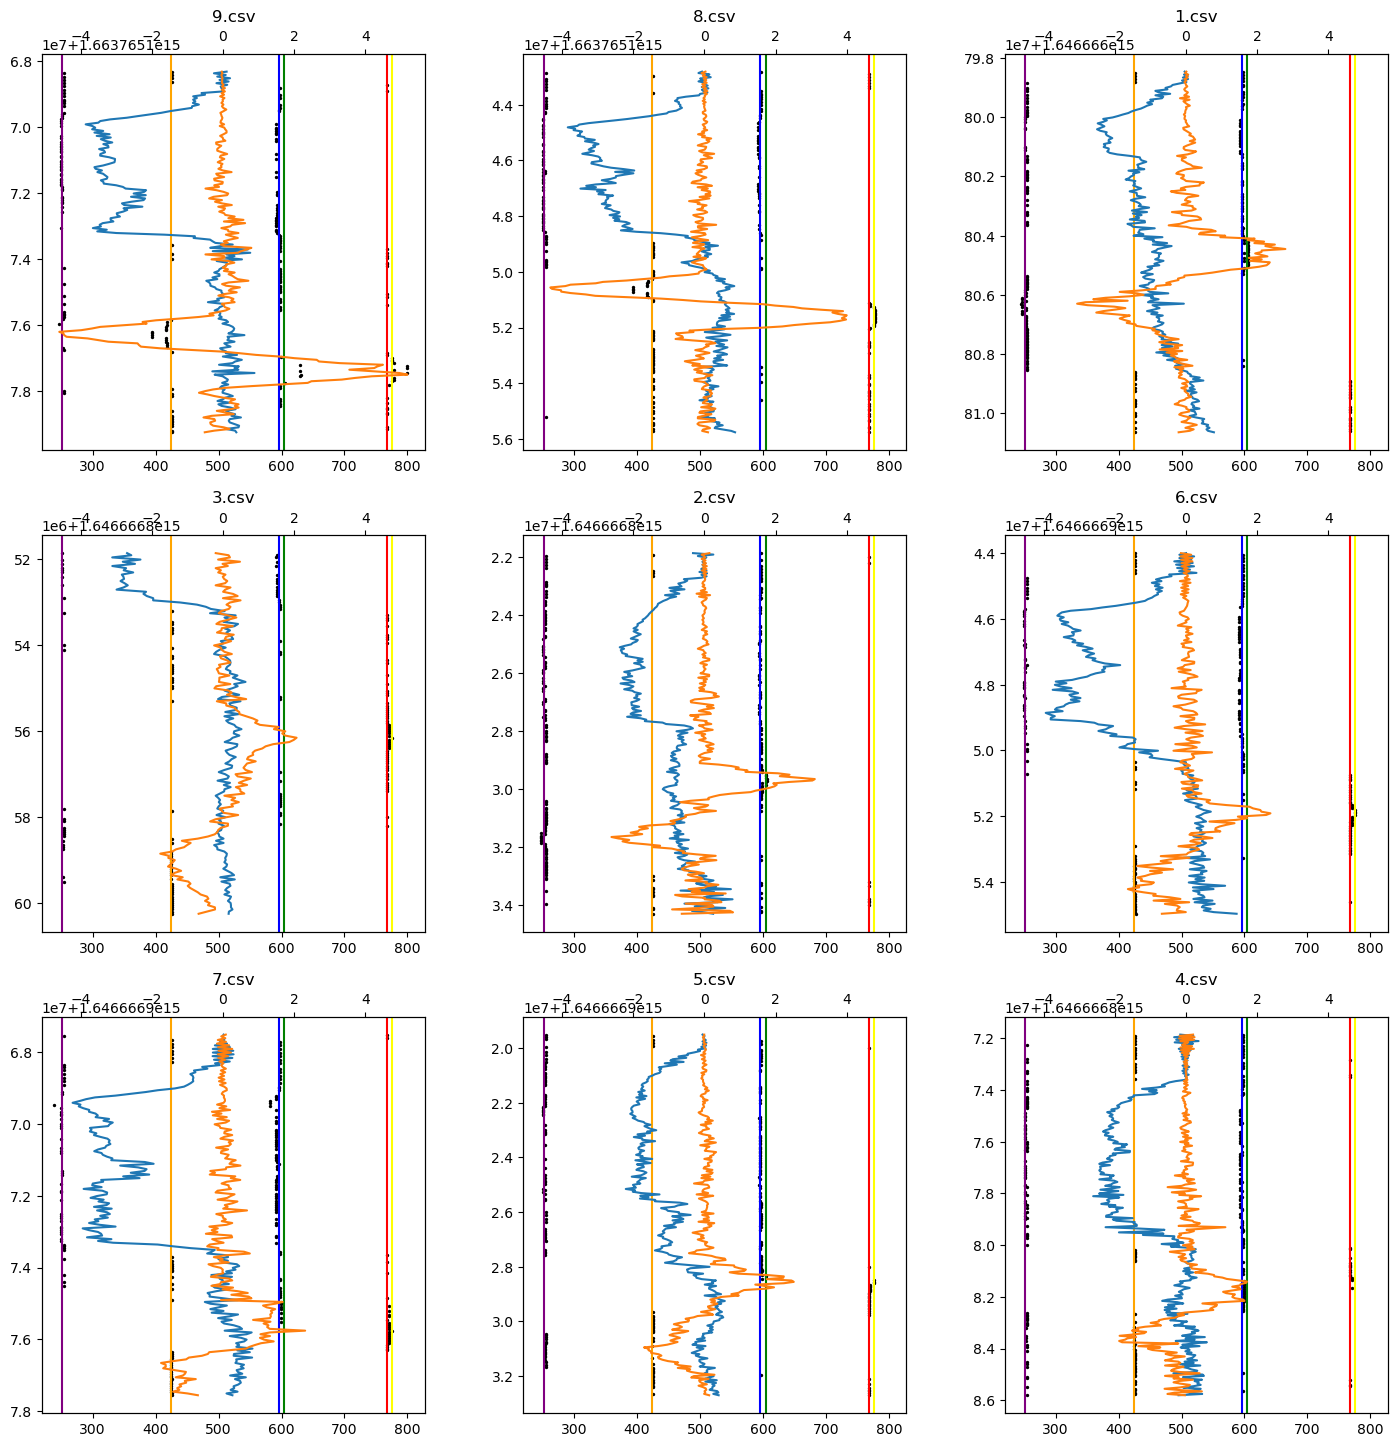

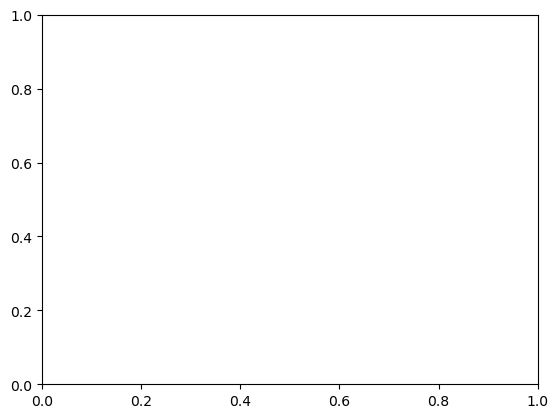

In [57]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_with_original_data_on_secondary_axis_with_baseline(LaneChange_Update_Path,'accel_lon','accel_trans','ts',16,16,1,1,3,3,baselines_list,baseline_color_list)